In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data=pd.read_csv("Iris.csv")

In [13]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


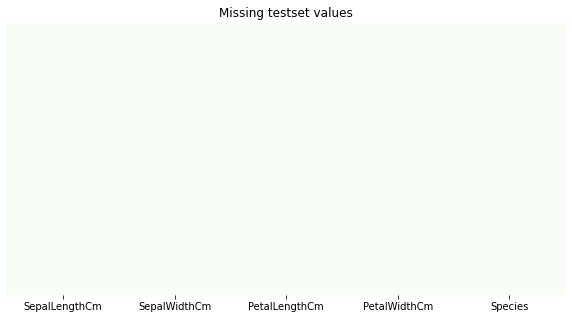

In [46]:
plt.figure(figsize=(10,5))
plt.title("Missing testset values")
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap="Greens")

In [16]:
data.isna().sum().sum()

0

In [ ]:
data.drop(labels=["Id"],axis=1,inplace=True)

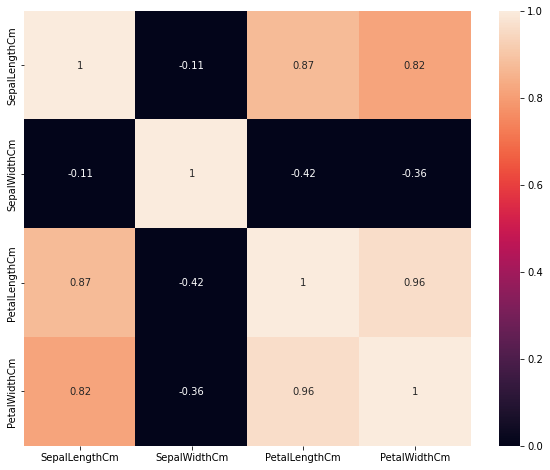

In [24]:
f = plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,vmin=0,vmax=1)

In [30]:
y=data["Species"]
x=data.drop(labels=["Species"],axis=1)

In [31]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1034)

In [42]:
X_train.shape

(105, 4)

In [43]:
y_train.shape

(105,)

In [38]:

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import (BernoulliNB,GaussianNB, MultinomialNB)
     

In [39]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 30 kB/s 


In [40]:
from catboost import CatBoostClassifier

In [44]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print("Random forest accuracy: {}".format(metrics.accuracy_score(y_test,rfc_pred)))
print()
print()


abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
abc_pred = abc.predict(X_test)
print("Adaboost accuracy: {}".format(metrics.accuracy_score(y_test,abc_pred)))
print()


bag = BaggingClassifier()
bag.fit(X_train,y_train)
bag_pred = bag.predict(X_test)
print("Bagging accuracy: {}".format(metrics.accuracy_score(y_test,bag_pred)))
print()



hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train,y_train)
hgbc_pred = hgbc.predict(X_test)
print("Hist gradient boosting accuracy: {}".format(metrics.accuracy_score(y_test,hgbc_pred)))
print()


gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print("Gaussian NB accuracy: {}".format(metrics.accuracy_score(y_test,gnb_pred)))
print()


mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb_pred = mnb.predict(X_test)
print("Multinomial NB accuracy: {}".format(metrics.accuracy_score(y_test,mnb_pred)))
print()

CBC = CatBoostClassifier(silent=True,depth=6,iterations=500)
CBC.fit(X_train, y_train)
CBC_pred = CBC.predict(X_test)
print("CBC accuracy: {}".format(metrics.accuracy_score(y_test,CBC_pred)))


Random forest accuracy: 0.9555555555555556


Adaboost accuracy: 0.9555555555555556

Bagging accuracy: 0.9555555555555556

Hist gradient boosting accuracy: 0.9777777777777777

Gaussian NB accuracy: 0.9555555555555556

Multinomial NB accuracy: 0.9333333333333333

CBC accuracy: 0.9777777777777777


##Cat boost classifier of decision tree has the heighest score so we will train and test dataset on it